In [4]:
# **Parameter-Einstellungen**
CSV_FILE = "../data/image_data_rel.csv"
ORIGINAL_IMG_SIZE = (256, 256)  # Originalbildgröße
TARGET_IMG_SIZE = (299, 299)  # Zielgröße nach Resize 299 required by InceptionV3
IMAGES_PER_LABEL = 20  # Anzahl Bilder pro Label
EPOCHS = 20  # Anzahl der Trainings-Epochen
BATCH_SIZE = 20  # Batch-Size fürs Training
VALIDATION_SPLIT = 0.2  # Anteil der Daten für Validierung

In [12]:
import tensorflow as tf
from data_loader import load_image_data

# **GPU auswählen**
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])


# load data
X_train, X_val, y_train, y_val, label_map = load_image_data(
    csv_file="../data/image_data_rel.csv",
    img_size=(299, 299),
    images_per_label=20,
    validation_split=0.2
)

### InceptionV3 (former GoogleNet)

In [13]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# pretrained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=TARGET_IMG_SIZE + (3,))
base_model.trainable = False

# custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(label_map), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.1535 - loss: 2.9245 - val_accuracy: 0.2333 - val_loss: 2.4335
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.3117 - loss: 2.1198 - val_accuracy: 0.4833 - val_loss: 1.7360
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5992 - loss: 1.3671 - val_accuracy: 0.5333 - val_loss: 1.4746
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7305 - loss: 0.9882 - val_accuracy: 0.5667 - val_loss: 1.3311
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8500 - loss: 0.7098 - val_accuracy: 0.6333 - val_loss: 1.3181
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8223 - loss: 0.7204 - val_accuracy: 0.6000 - val_loss: 1.1524
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8865 - loss: 0.5525 - val_accuracy: 0.6333 - val_loss: 1.1254
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9208 - loss: 0.4359 - val_accuracy: 0.

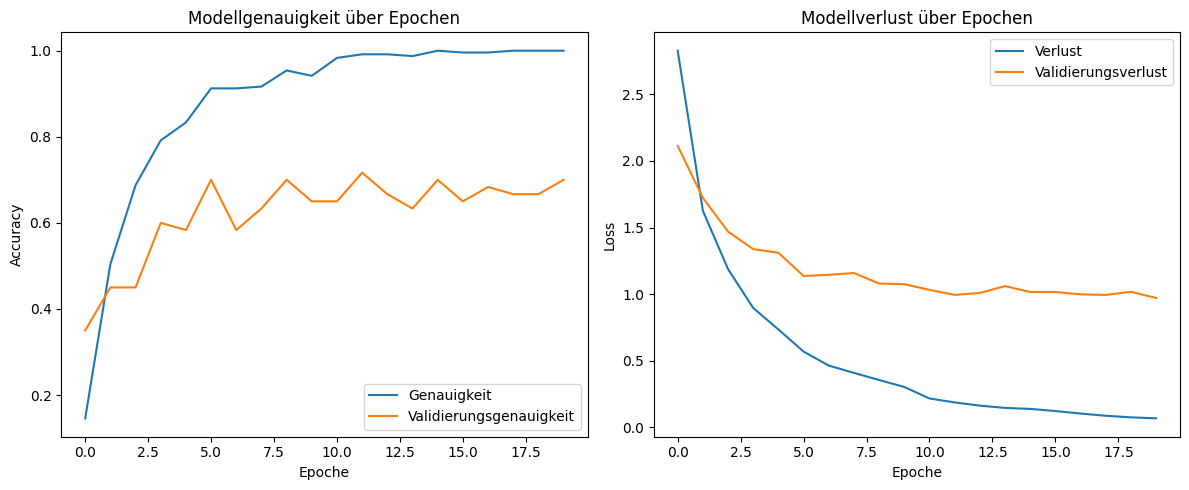

In [11]:
from training_plotter import plot_training_history

plot_training_history(history)